# Premier League 2017/18 EDA

An exploratory data analysis on the 2017/18 English Premier League season

## Context:

The English Premier League (EPL) is the top tier of England's football pyramid. There are 20 teams within the Premier League that compete against each other throughout the football season - beginning in August and ending in May. 

In the 2017/18 Premier League campaign, Manchester City (also known as Man City) were crowned Premier League champions. The Cityzens achieved this feat by accumulating a record breaking 100 points, the most points collected by a team in the Premier League era.

To accumulate 100 or more points in a single campaign is a feat only ever done by some of the greatest teams of all time across Europe's top tier of football such as Real Madrid (2011/12), FC Barcelona (2012/13) and Juventus (2013/14).

We will be analyzing data from the 2017/18 Premier League campaign to further understand how a massive achievement was accomplished.

In [1]:
#Importing libraries

import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
#Importing matchday dataset

matchday = pd.read_csv("2017_18 matches.csv")

In [3]:
#Importing players dataset

players = pd.read_csv("pl_17-18.csv")

## Matchday Analysis

Firstly, let us analyze the 2017/18 Premier League matchdays as a whole

In [4]:
#Observing the first 10 entries of the matchday dataset

matchday.head(10)

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0
5,E0,2017-08-12,Southampton,Swansea,0,0,D,0,0,D,...,2,0,10,13,13,0,2,1,0,0
6,E0,2017-08-12,Watford,Liverpool,3,3,D,2,1,H,...,4,5,14,8,3,3,0,3,0,0
7,E0,2017-08-12,West Brom,Bournemouth,1,0,H,1,0,H,...,6,2,15,3,8,2,3,1,0,0
8,E0,2017-08-13,Man United,West Ham,4,0,H,1,0,H,...,6,1,19,7,11,1,2,2,0,0
9,E0,2017-08-13,Newcastle,Tottenham,0,2,A,0,0,D,...,3,6,6,10,5,7,1,2,1,0


In [5]:
#Observing the data types of each column

matchday.dtypes

div         object
date        object
hometeam    object
awayteam    object
fthg         int64
ftag         int64
ftr         object
hthg         int64
htag         int64
htr         object
referee     object
hs           int64
as           int64
hst          int64
ast          int64
hf           int64
af           int64
hc           int64
ac           int64
hy           int64
ay           int64
hr           int64
ar           int64
dtype: object

In [6]:
#Summarizing the data

matchday.describe()

,fthg,ftag,hthg,htag,hs,as,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.531579,1.147368,0.607895,0.515789,13.589474,10.857895,4.628947,3.765789,10.218421,10.484211,5.744737,4.547368,1.478947,1.565789,0.044737,0.057895
std,1.340087,1.177793,0.793403,0.756511,5.773645,4.856333,2.710617,2.314435,3.256360,3.334043,2.998786,2.765290,1.256993,1.259639,0.219375,0.233852
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.500000,4.000000,3.500000,10.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,3.000000,35.000000,30.000000,15.000000,14.000000,19.000000,26.000000,18.000000,13.000000,6.000000,7.000000,2.000000,1.000000


### Data Cleaning

In [7]:
matchday.head(10)

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0
5,E0,2017-08-12,Southampton,Swansea,0,0,D,0,0,D,...,2,0,10,13,13,0,2,1,0,0
6,E0,2017-08-12,Watford,Liverpool,3,3,D,2,1,H,...,4,5,14,8,3,3,0,3,0,0
7,E0,2017-08-12,West Brom,Bournemouth,1,0,H,1,0,H,...,6,2,15,3,8,2,3,1,0,0
8,E0,2017-08-13,Man United,West Ham,4,0,H,1,0,H,...,6,1,19,7,11,1,2,2,0,0
9,E0,2017-08-13,Newcastle,Tottenham,0,2,A,0,0,D,...,3,6,6,10,5,7,1,2,1,0


In [8]:
#Checking for null values

matchday.isna().sum()

div         0
date        0
hometeam    0
awayteam    0
fthg        0
ftag        0
ftr         0
hthg        0
htag        0
htr         0
referee     0
hs          0
as          0
hst         0
ast         0
hf          0
af          0
hc          0
ac          0
hy          0
ay          0
hr          0
ar          0
dtype: int64

In [9]:
#Checking for duplicated rows

matchday[matchday.duplicated()]

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar


Fortunately, there are no null values or duplicated rows in our matchday dataset

### Univariate Analysis

In [10]:
matchday.head(10)

,div,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,E0,2017-08-11,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,12,9,4,0,1,0,0
1,E0,2017-08-12,Brighton,Man City,0,2,A,0,0,D,...,2,4,6,9,3,10,0,2,0,0
2,E0,2017-08-12,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,16,11,8,5,3,3,2,0
3,E0,2017-08-12,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,7,19,12,9,1,3,0,0
4,E0,2017-08-12,Everton,Stoke,1,0,H,1,0,H,...,4,1,13,10,6,7,1,1,0,0
5,E0,2017-08-12,Southampton,Swansea,0,0,D,0,0,D,...,2,0,10,13,13,0,2,1,0,0
6,E0,2017-08-12,Watford,Liverpool,3,3,D,2,1,H,...,4,5,14,8,3,3,0,3,0,0
7,E0,2017-08-12,West Brom,Bournemouth,1,0,H,1,0,H,...,6,2,15,3,8,2,3,1,0,0
8,E0,2017-08-13,Man United,West Ham,4,0,H,1,0,H,...,6,1,19,7,11,1,2,2,0,0
9,E0,2017-08-13,Newcastle,Tottenham,0,2,A,0,0,D,...,3,6,6,10,5,7,1,2,1,0


### Match Outcomes

We will be conducting a general breakdown of match outcomes across the 2017/18 campaign

In [11]:
#Win Breakdown

matchday["ftr"].value_counts()

ftr
H    173
A    108
D     99
Name: count, dtype: int64

In [12]:
#Home Win Percentage

home_win_percentage = round(((matchday["ftr"] == "H").sum() / (matchday["ftr"].value_counts().sum())), 2)

In [13]:
#Away Win Percentage

away_win_percentage = round(((matchday["ftr"] == "A").sum() / (matchday["ftr"].value_counts().sum())), 2)

In [14]:
#Draw Percentage

draw_percentage = round(((matchday["ftr"] == "D").sum() / (matchday["ftr"].value_counts().sum())), 2)

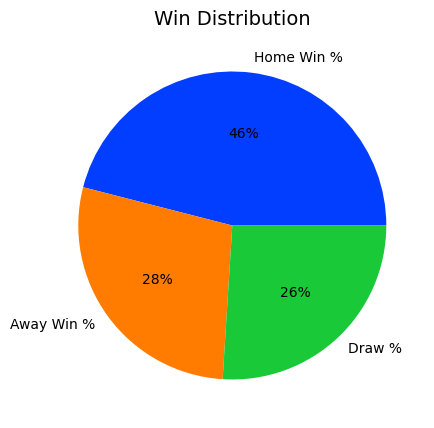

In [15]:
data = [home_win_percentage, away_win_percentage, draw_percentage]
keys = ["Home Win %", "Away Win %", "Draw %"]
color = sns.color_palette('bright')

plt.figure(figsize=(12, 5))
plt.pie(data, labels=keys, colors=color, autopct='%.0f%%')
plt.title("Win Distribution", fontsize=14, color="black")
plt.show()

We observe that a team has a near 50% probability of winning when playing at home; with the other outcomes being at near equal probabilities.

We can further breakdown the matchday outcomes by looking at the result at half-time compared to the result at full-time.

In [16]:
# Scenario 1: When home team is losing at half time and wins at full time
#ahhf = away_half_home_full

ahhf = round((matchday[(matchday["htr"] == "A") & (matchday["ftr"] == "H")].shape[0] / matchday.shape[0]), 3)

In [18]:
# Scenario 2:  When away team is losing at half time and wins at full time
#hhaf = home_half_away_full

hhaf = round((matchday[(matchday["htr"] == "H") & (matchday["ftr"] == "A")].shape[0] / matchday.shape[0]), 3)

In [19]:
# Scenario 3:  When home team is losing at half time and draws at full time
#ahdf = away_half_draw_full

ahdf = round((matchday[(matchday["htr"] == "A") & (matchday["ftr"] == "D")].shape[0] / matchday.shape[0]), 3)

In [20]:
# Scenario 4:  When away team is losing at half time and draws at full time
#hhd = home_half_draw_full

hhdf = round((matchday[(matchday["htr"] == "H") & (matchday["ftr"] == "D")].shape[0] / matchday.shape[0]), 3)

In [21]:
# Scenario 5: When home team is winning half time and wins full time
#hhhf = home_half_home_full

hhhf = round((matchday[(matchday["htr"] == "H") & (matchday["ftr"] == "H")].shape[0] / matchday.shape[0]), 3)

In [22]:
# Scenario 6: When away team is winning half time and wins full time
#ahaf = away_half_away_full

ahaf = round((matchday[(matchday["htr"] == "A") & (matchday["ftr"] == "A")].shape[0] / matchday.shape[0]), 3)

In [23]:
# Scenario 7: When teams are tied at the half and home team wins
#dhhf = draw_half_home_full
dhhf = round((matchday[(matchday["htr"] == "D") & (matchday["ftr"] == "H")].shape[0] / matchday.shape[0]), 3)

In [24]:
# Scenario 8: When teams are tied at the half and the away team wins
#dhaf = draw_half_away_full

dhaf = round((matchday[(matchday["htr"] == "D") & (matchday["ftr"] == "A")].shape[0] / matchday.shape[0]), 3)

In [25]:
# Scenario 9: When teams are tied at the half and tie at full time
#dhdf = draw_half_draw_full

dhdf = round((matchday[(matchday["htr"] == "D") & (matchday["ftr"] == "D")].shape[0] / matchday.shape[0]), 3)

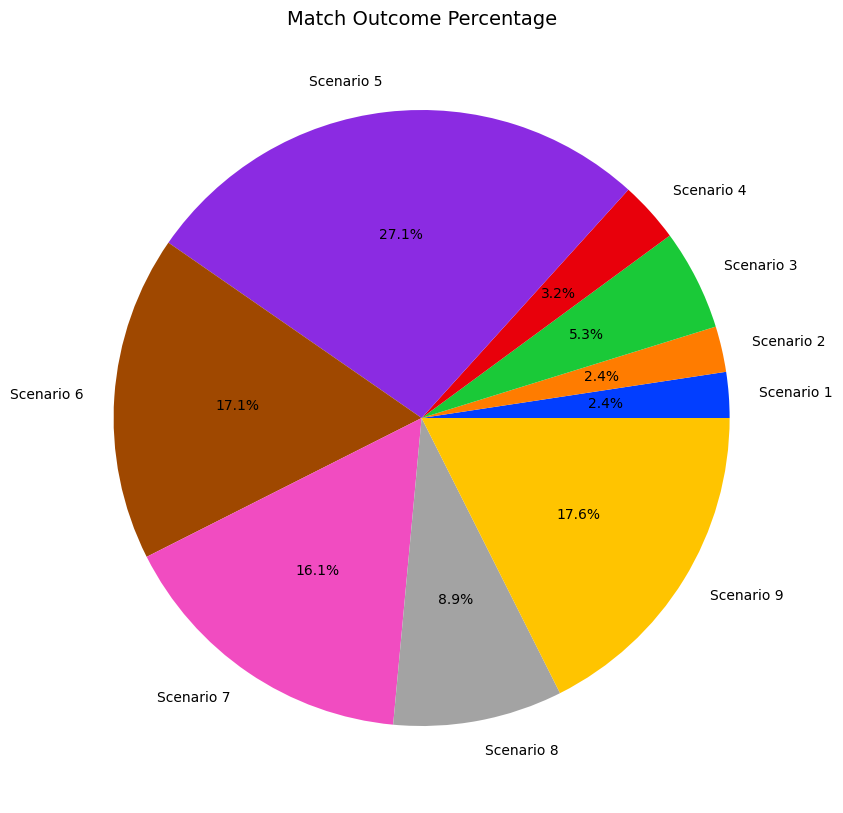

In [26]:
data = [ahhf, hhaf, ahdf, hhdf, hhhf, ahaf, dhhf, dhaf, dhdf]
keys = ["Scenario 1", "Scenario 2", "Scenario 3", "Scenario 4", "Scenario 5", "Scenario 6", "Scenario 7", "Scenario 8", "Scenario 9"]
color = sns.color_palette('bright')

plt.figure(figsize=(10, 10))
plt.pie(data, labels=keys, colors=color, autopct='%.1f%%')
plt.title("Match Outcome Percentage", fontsize=14, color="black")
plt.show()

When comparing half-time results to full-time results, we see that a team playing at home is most likely to win the game if they are winning by half-time. Whereas it less likely for a team to make a comeback win at full-time after being down at the half.

In [27]:
teams = matchday["hometeam"].unique()
teams = np.sort(teams)
teams

array(['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Huddersfield', 'Leicester',
       'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Southampton',
       'Stoke', 'Swansea', 'Tottenham', 'Watford', 'West Brom',
       'West Ham'], dtype=object)

### Discipline

### Goals

We will now be analyzing the goals scored across the campaign

In [28]:
#Total Goals scored across the season

total_goals = matchday["fthg"].sum() + matchday["ftag"].sum()
print(f"Total Number of Goals scored in the 2017/18 season is: {total_goals}")

Total Number of Goals scored in the 2017/18 season is: 1018


In [29]:
goals = matchday[["hometeam", "awayteam", "fthg", "ftag", "hthg", "htag"]]
goals

,hometeam,awayteam,fthg,ftag,hthg,htag
0,Arsenal,Leicester,4,3,2,2
1,Brighton,Man City,0,2,0,0
2,Chelsea,Burnley,2,3,0,3
3,Crystal Palace,Huddersfield,0,3,0,2
4,Everton,Stoke,1,0,1,0
...,...,...,...,...,...,...
375,Newcastle,Chelsea,3,0,1,0
376,Southampton,Man City,0,1,0,0
377,Swansea,Stoke,1,2,1,2
378,Tottenham,Leicester,5,4,1,2


In [30]:
home_goals = goals.groupby(by="hometeam")["fthg"].sum()
home_goals

hometeam
Arsenal           54
Bournemouth       26
Brighton          24
Burnley           16
Chelsea           30
Crystal Palace    29
Everton           28
Huddersfield      16
Leicester         25
Liverpool         45
Man City          61
Man United        38
Newcastle         21
Southampton       20
Stoke             20
Swansea           17
Tottenham         40
Watford           27
West Brom         21
West Ham          24
Name: fthg, dtype: int64

It is said in football that goals win games. It should come as no surprise that the winners, Manchester City (Man City), have scored the most goals at home with 61

In [31]:
away_goals = goals.groupby(by="awayteam")["ftag"].sum()
away_goals

awayteam
Arsenal           20
Bournemouth       19
Brighton          10
Burnley           20
Chelsea           32
Crystal Palace    16
Everton           16
Huddersfield      12
Leicester         31
Liverpool         39
Man City          45
Man United        30
Newcastle         18
Southampton       17
Stoke             15
Swansea           11
Tottenham         34
Watford           17
West Brom         10
West Ham          24
Name: ftag, dtype: int64

In addition to their impressive home offense, Man City possess the best goal scoring record away from home with 45 goals scored away from the Etihad, their home stadium.

In [32]:
total_goals = pd.merge(home_goals, away_goals, left_on="hometeam", right_on="awayteam", suffixes=["_home", "_away"])
total_goals["Team"] = teams
total_goals = total_goals.set_index("Team")
total_goals

,fthg,ftag
Team,,
Arsenal,54,20
Bournemouth,26,19
Brighton,24,10
Burnley,16,20
Chelsea,30,32
Crystal Palace,29,16
Everton,28,16
Huddersfield,16,12
Leicester,25,31


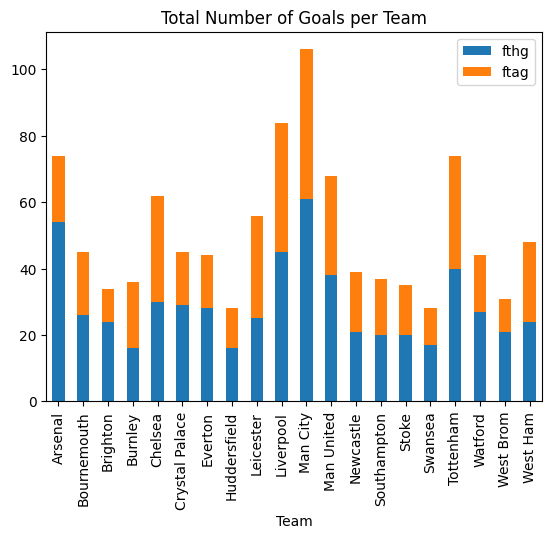

In [33]:
ax = total_goals[["fthg", "ftag"]].plot(kind="bar", stacked=True, title="Total Number of Goals per Team")

Along with amassing a spectacular 100 points, Man City have also managed to surpass 100 goals scored (105) in the 2017/18 Premier League season.

In [34]:
#Total Bookings Given

total_bookings = matchday["hy"].sum() + matchday["ay"].sum() + matchday["hr"].sum() + matchday["ar"].sum()
print(f"Total Number of Bookings given in the 2017/18 season is: {total_bookings}")

Total Number of Bookings given in the 2017/18 season is: 1196


In [35]:
discipline = matchday[["hometeam", "awayteam", "hy", "ay", "hr", "ar"]]
discipline

,hometeam,awayteam,hy,ay,hr,ar
0,Arsenal,Leicester,0,1,0,0
1,Brighton,Man City,0,2,0,0
2,Chelsea,Burnley,3,3,2,0
3,Crystal Palace,Huddersfield,1,3,0,0
4,Everton,Stoke,1,1,0,0
...,...,...,...,...,...,...
375,Newcastle,Chelsea,0,1,0,0
376,Southampton,Man City,3,1,0,0
377,Swansea,Stoke,1,2,0,0
378,Tottenham,Leicester,1,2,0,0


In [36]:
home_discipline = discipline.groupby(by="hometeam")[["hy", "hr"]].sum()
home_discipline

,hy,hr
hometeam,,
Arsenal,25,1
Bournemouth,31,1
Brighton,37,1
Burnley,27,0
Chelsea,19,3
Crystal Palace,38,0
Everton,28,1
Huddersfield,26,2
Leicester,22,2


In [37]:
away_discipline = discipline.groupby(by="awayteam")[["ay", "ar"]].sum()
away_discipline

,ay,ar
awayteam,,
Arsenal,32,1
Bournemouth,24,0
Brighton,17,1
Burnley,38,0
Chelsea,22,1
Crystal Palace,33,0
Everton,23,2
Huddersfield,35,1
Leicester,30,3


In [38]:
total_discipline = pd.merge(home_discipline, away_discipline, left_on="hometeam", right_on="awayteam", suffixes=["_home", "_away"])
total_discipline["Team"] = teams
total_discipline = total_discipline.set_index("Team")
total_discipline

,hy,hr,ay,ar
Team,,,,
Arsenal,25,1,32,1
Bournemouth,31,1,24,0
Brighton,37,1,17,1
Burnley,27,0,38,0
Chelsea,19,3,22,1
Crystal Palace,38,0,33,0
Everton,28,1,23,2
Huddersfield,26,2,35,1
Leicester,22,2,30,3


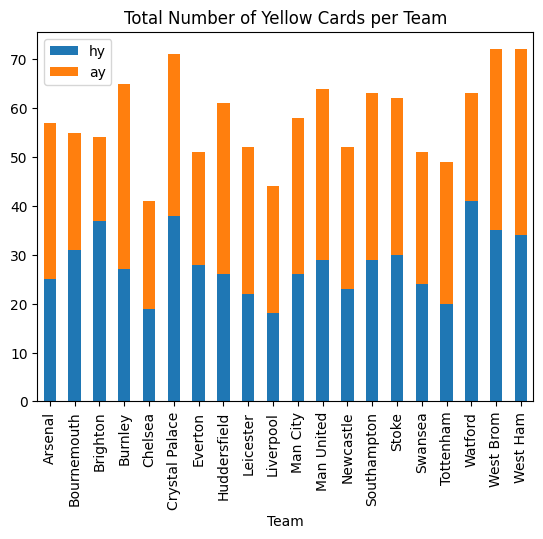

In [39]:
ax = total_discipline[["hy", "ay"]].plot(kind="bar", stacked=True, title="Total Number of Yellow Cards per Team")

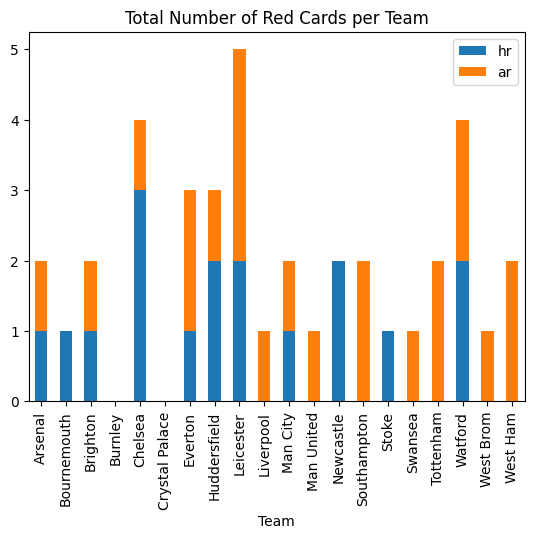

In [40]:
ax = total_discipline[["hr", "ar"]].plot(kind="bar", stacked=True, title="Total Number of Red Cards per Team")

In [41]:
ht_fouls = matchday.groupby(by="hometeam")["hf"].sum()

In [42]:
at_fouls = matchday.groupby(by="awayteam")["af"].sum()

In [43]:
total_discipline["hf"] = ht_fouls
total_discipline["af"] = at_fouls
total_discipline["yellows"] = total_discipline["hy"] + total_discipline["ay"]
total_discipline["reds"] = total_discipline["hr"] + total_discipline["ar"]
total_discipline["fouls"] = total_discipline["hf"] + total_discipline["af"]

In [44]:
total_discipline

,hy,hr,ay,ar,hf,af,yellows,reds,fouls
Team,,,,,,,,,
Arsenal,25,1,32,1,186,197,57,2,383
Bournemouth,31,1,24,0,165,174,55,1,339
Brighton,37,1,17,1,198,215,54,2,413
Burnley,27,0,38,0,167,183,65,0,350
Chelsea,19,3,22,1,183,180,41,4,363
Crystal Palace,38,0,33,0,215,210,71,0,425
Everton,28,1,23,2,234,225,51,3,459
Huddersfield,26,2,35,1,180,216,61,3,396
Leicester,22,2,30,3,180,185,52,5,365


## Players Analysis

Now we will analyze the individual players from the team

### Data Cleaning

In [48]:
players.head(10)

,Unnamed: 0,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,...,Shooting accuracy %,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,0,Rolando Aarons,Midfielder,4,NaN,NaN,4.0,100%,NaN,0.0,...,50%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Abdul Rahman Baba,Defender,0,0.0,0.0,0.0,0%,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tammy Abraham,Forward,31,NaN,NaN,10.0,NaN,NaN,11.0,...,36%,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Charlie Adam,Midfielder,11,NaN,NaN,9.0,56%,NaN,3.0,...,30%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Adrián,Goalkeeper,19,6.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,69.0,0.0,6.0,9.0,2.0,15.0,47.0,184.0
5,5,Adrien Silva,Midfielder,12,NaN,NaN,22.0,59%,NaN,5.0,...,18%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Ibrahim Afellay,Midfielder,6,NaN,NaN,3.0,100%,NaN,0.0,...,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Benik Afobe,Forward,17,NaN,NaN,4.0,NaN,NaN,4.0,...,38%,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Sergio Agüero,Forward,25,NaN,NaN,9.0,NaN,NaN,20.0,...,45%,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Daniel Agyei,Forward,0,NaN,NaN,0.0,NaN,NaN,0.0,...,0%,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
players.describe()

,Unnamed: 0,Appearances,Clean sheets,Goals conceded,Tackles,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,...,Shots on target,Big chances missed,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
count,793.000000,793.000000,340.000000,340.000000,705.000000,252.000000,705.000000,705.000000,705.000000,705.000000,...,453.000000,453.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,396.000000,12.373266,2.952941,14.458824,16.777305,0.150794,3.374468,11.826950,24.839716,13.455319,...,5.695364,1.298013,24.022727,0.238636,3.727273,5.954545,2.306818,4.500000,33.488636,66.534091
std,229.063674,13.589839,3.950747,18.073630,22.803946,0.447525,5.745693,17.281464,47.144647,27.492996,...,9.770141,2.878348,40.708376,0.587109,6.720576,10.979510,4.460189,8.675504,58.635244,111.713606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,396.000000,5.000000,0.000000,4.000000,5.000000,0.000000,0.000000,2.000000,4.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,594.000000,26.000000,5.250000,27.250000,30.000000,0.000000,4.000000,19.000000,26.000000,13.000000,...,7.000000,1.000000,34.250000,0.000000,4.250000,8.250000,3.000000,5.000000,39.250000,95.000000
max,792.000000,38.000000,18.000000,62.000000,138.000000,3.000000,48.000000,85.000000,327.000000,237.000000,...,76.000000,23.000000,144.000000,3.000000,24.000000,52.000000,23.000000,40.000000,223.000000,358.000000


In [50]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              793 non-null    int64  
 1   Name                    793 non-null    object 
 2   Position                793 non-null    object 
 3   Appearances             793 non-null    int64  
 4   Clean sheets            340 non-null    float64
 5   Goals conceded          340 non-null    float64
 6   Tackles                 705 non-null    float64
 7   Tackle success %        546 non-null    object 
 8   Last man tackles        252 non-null    float64
 9   Blocked shots           705 non-null    float64
 10  Interceptions           705 non-null    float64
 11  Clearances              705 non-null    float64
 12  Headed Clearance        705 non-null    float64
 13  Clearances off line     252 non-null    float64
 14  Recoveries              546 non-null    fl

In [51]:
#Dropping unnecessary columns

players = players[[#'Unnamed: 0',
      'Name', 'Position', 'Appearances', 'Clean sheets',
       'Goals conceded', 'Tackles', 'Tackle success %', 'Last man tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Goals',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Hit woodwork', 'Goals per match', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %',
       'Big chances missed', 'Saves', 'Penalties saved', 'Punches',
       'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks']].copy()

In [52]:
#Dealing with null values

players.isna().sum()

Name                        0
Position                    0
Appearances                 0
Clean sheets              453
Goals conceded            453
Tackles                    88
Tackle success %          247
Last man tackles          541
Blocked shots              88
Interceptions              88
Clearances                 88
Headed Clearance           88
Clearances off line       541
Recoveries                247
Duels won                 247
Duels lost                247
Successful 50/50s         247
Aerial battles won        247
Aerial battles lost       247
Own goals                 453
Errors leading to goal    159
Assists                     0
Passes                      0
Passes per match            0
Big chances created        88
Crosses                    88
Cross accuracy %          247
Through balls             247
Accurate long balls       159
Yellow cards                0
Red cards                   0
Fouls                       0
Offsides                   88
Goals     

For null values in our player dataset, we will assign a zero value to them. For example, attributes such as Catches, Goal Kicks, Sweeper clearances, etc. will be null for all players who are not goalkeepers.

In [53]:
#Dealing with null values for dtypes == float

players_float = players.select_dtypes(np.float_)
players_float.columns

Index(['Clean sheets', 'Goals conceded', 'Tackles', 'Last man tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Passes per match',
       'Big chances created', 'Crosses', 'Through balls',
       'Accurate long balls', 'Offsides', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Hit woodwork',
       'Goals per match', 'Penalties scored', 'Freekicks scored', 'Shots',
       'Shots on target', 'Big chances missed', 'Saves', 'Penalties saved',
       'Punches', 'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks'],
      dtype='object')

In [54]:
players[['Clean sheets', 'Goals conceded', 'Tackles', 'Last man tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Passes per match',
       'Big chances created', 'Crosses', 'Through balls',
       'Accurate long balls', 'Offsides', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Hit woodwork',
       'Goals per match', 'Penalties scored', 'Freekicks scored', 'Shots',
       'Shots on target', 'Big chances missed', 'Saves', 'Penalties saved',
       'Punches', 'High claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal kicks']] = players[['Clean sheets', 'Goals conceded', 'Tackles', 'Last man tackles',
       'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Passes per match',
       'Big chances created', 'Crosses', 'Through balls',
       'Accurate long balls', 'Offsides', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Hit woodwork',
       'Goals per match', 'Penalties scored', 'Freekicks scored', 'Shots',
       'Shots on target', 'Big chances missed', 'Saves', 'Penalties saved',
       'Punches', 'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks']].fillna(0.0)

In [55]:
players.isna().sum()

Name                        0
Position                    0
Appearances                 0
Clean sheets                0
Goals conceded              0
Tackles                     0
Tackle success %          247
Last man tackles            0
Blocked shots               0
Interceptions               0
Clearances                  0
Headed Clearance           88
Clearances off line         0
Recoveries                  0
Duels won                   0
Duels lost                  0
Successful 50/50s           0
Aerial battles won          0
Aerial battles lost         0
Own goals                   0
Errors leading to goal      0
Assists                     0
Passes                      0
Passes per match            0
Big chances created         0
Crosses                     0
Cross accuracy %          247
Through balls               0
Accurate long balls         0
Yellow cards                0
Red cards                   0
Fouls                       0
Offsides                    0
Goals     

In [56]:
#Dealing with null values for dtypes == object

players_obj = players.select_dtypes(include=[np.object_])
players_obj

,Name,Position,Tackle success %,Passes,Cross accuracy %,Shooting accuracy %
0,Rolando Aarons,Midfielder,100%,41,50%,50%
1,Abdul Rahman Baba,Defender,0%,0,0%,NaN
2,Tammy Abraham,Forward,NaN,300,NaN,36%
3,Charlie Adam,Midfielder,56%,246,27%,30%
4,Adrián,Goalkeeper,NaN,520,NaN,NaN
...,...,...,...,...,...,...
788,Marvin Zeegelaar,Defender,78%,422,26%,NaN
789,Zhang Yuning,Forward,NaN,0,NaN,0%
790,Ron-Robert Zieler,Goalkeeper,NaN,0,NaN,NaN
791,Oleksandr Zinchenko,Defender,70%,672,0%,40%


In [57]:
#Filling in null values for non-float columns
players[["Tackle success %", "Cross accuracy %", "Shooting accuracy %"]] = players[["Tackle success %", "Cross accuracy %", "Shooting accuracy %"]].fillna("0%")
players[["Tackle success %", "Cross accuracy %", "Shooting accuracy %"]]

,Tackle success %,Cross accuracy %,Shooting accuracy %
0,100%,50%,50%
1,0%,0%,0%
2,0%,0%,36%
3,56%,27%,30%
4,0%,0%,0%
...,...,...,...
788,78%,26%,0%
789,0%,0%,0%
790,0%,0%,0%
791,70%,0%,40%


### Univariate Analysis

In [58]:
players.head(10)

,Name,Position,Appearances,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,...,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Headed clearance,High claims,Goal kicks
0,Rolando Aarons,Midfielder,4,0.0,0.0,4.0,100%,0.0,0.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1,Abdul Rahman Baba,Defender,0,0.0,0.0,0.0,0%,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,Tammy Abraham,Forward,31,0.0,0.0,10.0,0%,0.0,11.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,8.0,0.0,0.0
3,Charlie Adam,Midfielder,11,0.0,0.0,9.0,56%,0.0,3.0,9.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,5.0,0.0,0.0
4,Adrián,Goalkeeper,19,6.0,29.0,0.0,0%,0.0,0.0,0.0,...,0.0,6.0,9.0,2.0,15.0,47.0,184.0,0.0,9.0,184.0
5,Adrien Silva,Midfielder,12,0.0,0.0,22.0,59%,0.0,5.0,14.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
6,Ibrahim Afellay,Midfielder,6,0.0,0.0,3.0,100%,0.0,0.0,1.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0
7,Benik Afobe,Forward,17,0.0,0.0,4.0,0%,0.0,4.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,5.0,0.0,0.0
8,Sergio Agüero,Forward,25,0.0,0.0,9.0,0%,0.0,20.0,6.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0
9,Daniel Agyei,Forward,0,0.0,0.0,0.0,0%,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [59]:
players.columns

Index(['Name', 'Position', 'Appearances', 'Clean sheets', 'Goals conceded',
       'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Goals',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Hit woodwork', 'Goals per match', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %',
       'Big chances missed', 'Saves', 'Penalties saved', 'Punches',
       'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
       'Goal Kicks', 'Headed clearanc

In [60]:
top_10_goals = players.nlargest(10, ["Goals"])

<Figure size 1000x1000 with 0 Axes>

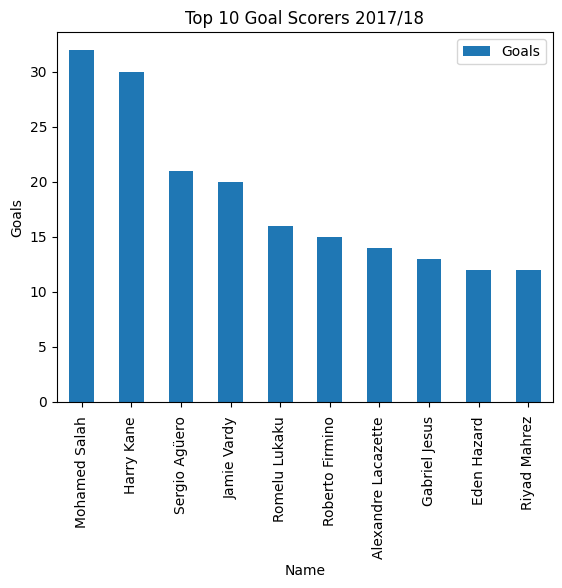

In [61]:
plt.figure(figsize=(10, 10))
ax = top_10_goals.plot.bar(x="Name", y="Goals")
ax.set_ylabel("Goals")
ax.set_title("Top 10 Goal Scorers 2017/18")
plt.show()

Looking at the top 10 goal scorers for the 2017/18 Premier League campaign, we see that three of them - namely Sergio Aguero, Gabriel Jesus, Riyad Mahrez - all play for Man City.

In [62]:
top_10_assists = players.nlargest(10, ["Assists"])

<Figure size 1000x1000 with 0 Axes>

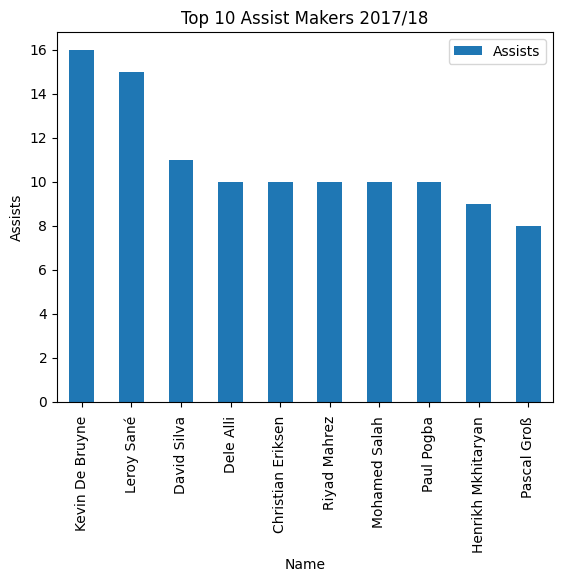

In [63]:
plt.figure(figsize=(10, 10))
ax = top_10_assists.plot.bar(x="Name", y="Assists")
ax.set_ylabel("Assists")
ax.set_title("Top 10 Assist Makers 2017/18")
plt.show()

Looking at the top 10 playmakers we observe four out of ten players from Man City - Kevin De Bruyne, Leroy Sane, David Silva, and Riyad Mahrez

In [64]:
top_10_clean_sheets_gk = players[players["Position"] == "Goalkeeper"].nlargest(10, ["Clean sheets"])

<Figure size 1000x1000 with 0 Axes>

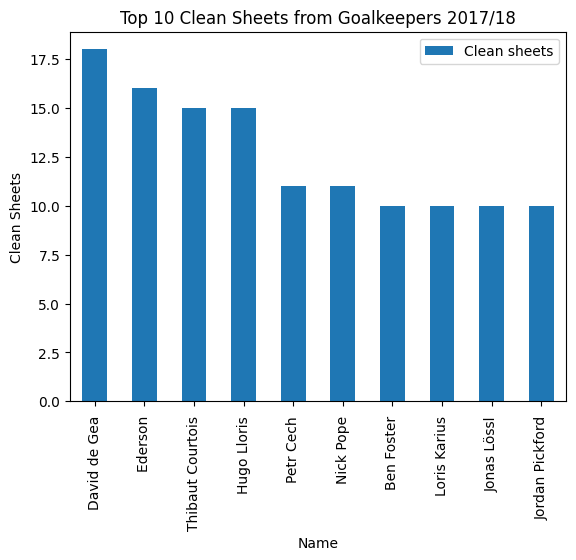

In [65]:
plt.figure(figsize=(10, 10))
ax = top_10_clean_sheets_gk.plot.bar(x="Name", y="Clean sheets")
ax.set_ylabel("Clean Sheets")
ax.set_title("Top 10 Clean Sheets from Goalkeepers 2017/18")
plt.show()

It is clear to see that Man City possesses arguably the best offense in the Premier League. Along with an impressive offense, an impressive defense is also a fundamental component in any winning team's formula.

We observe that Ederson, Man City's goal keeper, ranks second amongst the top 10 goal keepers with the most clean sheets.

In [66]:
top_10_clean_sheets = players.nlargest(10, ["Clean sheets"])

<Figure size 1000x1000 with 0 Axes>

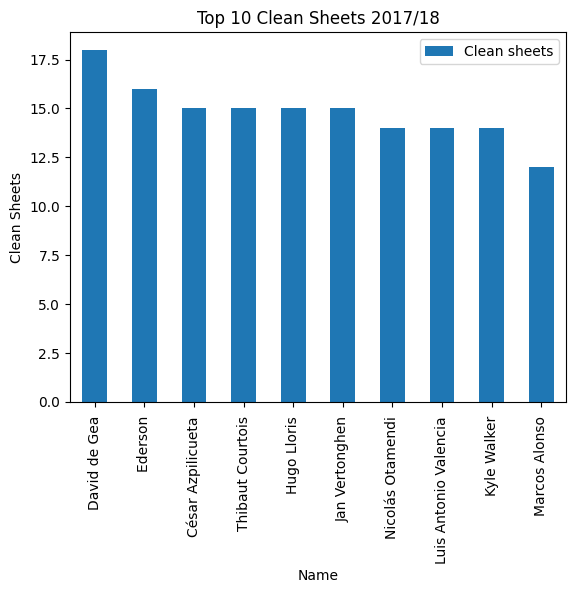

In [67]:
plt.figure(figsize=(10, 10))
ax = top_10_clean_sheets.plot.bar(x="Name", y="Clean sheets")
ax.set_ylabel("Clean Sheets")
ax.set_title("Top 10 Clean Sheets 2017/18")
plt.show()

The goalkeeper is not the sole position responsible for a good clean sheet record. It also the role of the men directly in front of the keeper, the defenders, that contribute to the lessening of goals conceded for any team.

We see that amongst the top 10 players with the most clean sheets, Cityzens occupy 3 of the 10 slots; those players being - Ederson, Nicolas Otamendi and Kyle Walker.

# Conclusion

In conclusion, we see that Manchester City's outstanding offensive and defensive stats contributed to them achieving this milestone; one which may never be replicated in the Premier League for a long time